In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
    
# Calculate the date 1 year ago from the last data point in the database
current_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]
current_date
prv_year = dt.datetime.strptime(current_date, '%Y-%m-%d') - dt.timedelta(days=365)



In [14]:
#prv_year = current_date - dt.timedelta(weeks = 52)
print(prv_year)
print(current_date)
#print(dt.date.today)

2016-08-23 00:00:00
2017-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
precipt_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date>= prv_year).all()


In [20]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipt_data_df = pd.DataFrame(precipt_data, columns=['date', 'prcp'])


In [21]:
# Sort the dataframe by date
precipt_data_df.sort_values(by="date", ascending=True)

,date,prcp
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


Text(0, 0.5, 'Inches')

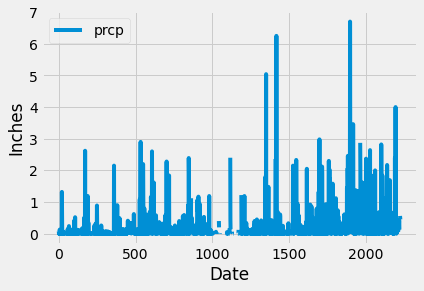

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
precipt_data_df.plot()
plt.xlabel("Date")
plt.ylabel("Inches")

In [24]:
 # Use Pandas to calcualte the summary statistics for the precipitation data
precipt_data_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [25]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(station.station)).all()

[(9)]

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs).filter(measurement.station=="USC00519281")).all()

[('USC00519397', 53.0, 87.0, 71.66378066378067)]

Text(0.5, -1.340000000000014, 'Temperature')

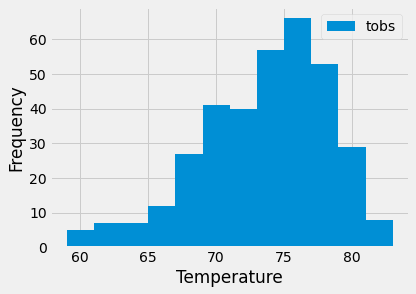

In [34]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

from pandas.plotting import table
prv_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

high_temp = session.query(measurement.tobs).\
        filter(measurement.station=="USC00519281").\
        filter(measurement.date>=prv_year).all()

precipt_data_df = pd.DataFrame(high_temp, columns=['tobs'])
precipt_data_df.plot.hist(bins=12)
plt.tight_layout()
plt.xlabel("Temperature")


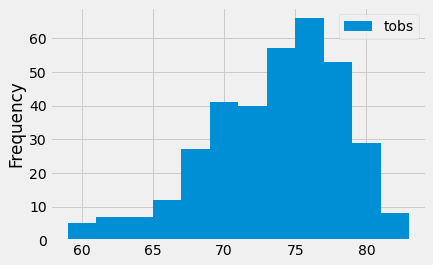

In [35]:
high_temp_df = pd.DataFrame(high_temp).plot(kind='hist', bins=12)

In [36]:
session.close()